<a href="https://colab.research.google.com/github/nats1207/ai_masterclass_rubicon/blob/ai_masterclass/Stan_Huiswerk_week_2%263a_Feature_engineering_ministerie_van_onderwijs_cultuur_wetenschap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Huiswerk week 2&3 deel A: Feature engineering 101**
##Onderzoek naar acedemische prestatie van studenten vanuit de overheid
---------------------------------------------

Rubicon heeft een nieuwe opdracht voor je gevonden. Helaas niet bij de ijsboer, maar zeker een plek waar je opgedane ML/AI-kennis kunt toepassen. Je bent aangenomen bij het ministerie van Onderwijs, Cultuur en Wetenschap!

Het ministerie van OCW heeft flink moeten bezuinigen. Dit resulteert in minder personeel dat studenten kan ondersteunen tijdens hun studie, en er zijn zorgen dat dit de studieresultaten flink zal verslechteren. Daarom is een team van specialisten aan het onderzoeken hoe universiteiten studenten voldoende ondersteuning kunnen blijven bieden met minder mankracht. Dit team van specialisten heeft bedacht om preventief persoonsgerichte ondersteuning te bieden aan studenten die het risico lopen hun studie niet te halen. Deze persoonsgebonden aanpak blijkt in de praktijk al goed te werken, maar is natuurlijk alleen nodig voor studenten die hun opleiding niet gaan halen en niet bedoeld om aan iedere student aan te bieden (want er zijn te weinig handjes)

Nu is jou gevraagd om, aan de hand van data, te onderzoeken of deze studenten preventief geïdentificeerd kunnen worden. Er is al een team bezig met het creëren van business rules en een ander team werkt aan een BI-rapport. Jij wordt gevraagd om te kijken of dit probleem aangepakt kan worden met ML/AI. Er is niet veel budget, dus er wordt in eerste instantie gekozen om met shallow learning-modellen te werken.

Je bent door het ministerie naar de Erasmus Universiteit Rotterdam gestuurd om daar onderzoek uit te voeren. Data wordt voor je verzameld maar verdere onderzoeken naar deze data moet jij uitvoeren.

Tijdens deze case moet je zelf gaan nadenken over hypotheses die je wilt toetsen, welke features/variabelen je wilt gebruiken, welk shallow learning-model je wilt toepassen en hoe de data-analyse plaatsvindt.

In [1]:
!pip install kagglehub

#stap 1: inladen van libraries en bijhorende functies
we gebruiken data beschikbaar gesteld op KAGGLE. KAGGLE is een website die verschillende datasets beschikbaar stelt en we gebruiken dan ook hun API om data binnen te laden (https://www.kaggle.com/). Deze is gratis benaderbaar en het enige wat we hoeven doen is hun library in te laden waarmee we een API kunnen gebruiken (zie dataset_download) om de data op te slaan in onze google colab.

In [2]:
import os           #library om omgeving (in dit geval je google colab en google drive) informatie op te vragen en omgeving functies te gebruiken
import pandas as pd #pandas om allerlei lineaire algebra functies uit te voeren en csv om te zetten naar een dataframpje
import kagglehub    #om API aan te roepen en modellen of data van kagglehub te kunnen gebruiken
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

In [3]:
# Download de dataset naar onze googledrive en check waar de bestanden zijn geplaatst
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")
files = os.listdir(path)

print("pad naar de map waar bestanden zijn geplaatst:", path)
print("Bestanden in de map:", files)

# Read the CSV file into a pandas DataFrame
file_path = "/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv"
df = pd.read_csv(file_path)

pad naar de map waar bestanden zijn geplaatst: /kaggle/input/student-habits-vs-academic-performance
Bestanden in de map: ['student_habits_performance.csv']


#opdracht 1a: hyptohese bouwen - verzamel informatie
**lees het volgende artikel:** https://www.analyticsvidhya.com/blog/2020/09/hypothesis-generation-data-science-projects/

--------------------------------------------------------------


De eerste dataset is aangeleverd door de Erasmus over studenten die hebben gestudeerd aan de Erasmus Universiteit Rotterdam. Je bekijkt de data en bent bezig met het formuleren van een hypothese: welke gegevens zijn nodig om te bepalen welke studenten extra aandacht nodig hebben en welke studenten dat niet nodig hebben, om de kwaliteit van de studie zo hoog mogelijk te houden? Je besluit klein te beginnen: je kiest voor een regressiemodel en een ander model. Voordat je echter aan de modellering begint, reflecteer je opnieuw op de consultancy-aspecten van de casus. Als een echte data scientist ga je vervolgens aan de slag met het opstellen van hypotheses.

------------------------------------------------------------------------

Beantwoord de volgende vragen:

1. Wat is het probleem dat je oplost?

2. Wie is de eindgebruiker en stakeholder?

3. Wat is het gewenste resultaat van je system, kan je die meer smart maken?

4. Stel dat je nu bij de ministerie van OCW op kantoor bent je hebt data, mensen en het internet. Wat zou je kunnen doen om je hypothese(s) op te bouwen over ons vraagtsuk? Met welke domeinexperts moet je overleggen?

5. Bekijk je data, start met het formuleren van de eerste versie van je hypothese (je kan niet met mensen praten maar dus wel kijken op het internet en gewoon naar je data kijken.) benoem welke variabelen je wilt gaan gebruiken en waarom

6. Wat word je label/ voorspellende variabele? Wat zijn de entiteiten/klassen die je model moet herkennen? het ministerie stelt een hele brede vraag, wanneer weten we of een student geholpen moet worden? maak dit concreet (je mag dus zelf fantaseren hierover wat logisch is, normaliter moet je deze definitie dus helemaal uitpluizen bij je klant)

7. Wees kritisch! wat maakt het moeilijk om hypothese te formuleren? wat mis je? wat zou je nodig hebben volgens jou om een beter AI/ML product te bouwen?

# **[dubbel klik hier en geef antwoord op de vragen]**
1. Hoe kan het OCW met minder personele capciteit toch effectieve preventieve en persoonsgebonden studieondersteuning bieden, gericht op die studenten die dreigen vertraging op te lopen of geheel uit te vallen. Focus van ons onderzoek is om te bepalen of het mogelijk is deze risicogroep preventief te identificeren.

2.

Eindgebruikers:
- Personeel wat de studenten momenteel ondersteund: het model gaat hen helpen om te voorspellen welke studenten preventieve ondersteuning nodig hebben.
- Universitair management: resulaten van het model kunnen via management informatie (BI tooling) gebruikt worden om (beleids)keuzes te maken. In een verdiepend project zou dit model mogelijk ook inzicht kunnen geven in risicostudenten over het volledige aanbod op de universiteit heen, wat als input kan dienen voor een bredere analyse van het studieaanbod en haar kwaliteit.

Stakeholders:
- OCW: willen onderbouwd investeren in gerichte en preventieve ondersteuning
- Universiteit als geheel: uitvoerende partij welke verantwoordelijk is voor het uiteindelijke beleid, de kwaliteit van de studies hoog wilt houden en de uitval laag.
- Personeel wat studenten momenteel ondersteund: zij moeten uiteindelijk het werk doen met ondersteuning van het voorspelmodel.
- Studenten: hopelijk krijgen de studenten die begeleiding nodig hebben op basis van het model ook daadwerkelijk de juiste hulp.
- Model ontwikkelaars: ontwikkelen en onderhouden van het model.
- IT afdeling universtiteit: het model moet ergens binnen de IT-architectuur terecht komen.
- Overheid: als een dergelijk model werkt voor OCW, zijn er wellicht meer toepassingen te verzinnen voor AI/ML om bij te dragen aan hetzelfde werk doen met minder mensen door (onder andere) bezuinigingen.

3. We willen een model maken wat bruikbaar is in de praktijk en op basis van (met de business besproken) statistieken een bepaalde zekerheid biedt dat de risicostudenten geïdentificeerd worden.
- Welke statistieken we gebruiken moet met het OWC/Universiteit besproken worden. Afhankelijk van wat zij belangrijk vinden, maken we een keuze.
- Doorlooptijd van het project dient besproken te worden.
- Beheer en onderhoud aan het model dient besproken te worden.
- In welke vorm het model aangeleverd dient te worden (met eventuele UI) dient besproken te worden.
- ROI berekening dient besproken te worden.

4. Je kan een aantal dingen doen om je hypotheses op te bouwen:
- Eigen kennis: zelf ook studenten geweest, wellicht zijn er logische redeneringen te maken vanuit je eigen belevingswereld.
- Domeinexperts: je wil een duidelijk beeld krijgen van het probleem, uitdagingen, factoren die belangrijk zijn en nuances van het domein. Hiervoor kan je spreken met:
  - Studenten: deze begrijpen de nuances misschien wel het best
  - Studieadviseurs: zien een hoop cases voorbij komen
  - Psychologen: wellicht hebben burnout of stress verschijnselen invloed op prestaties op de universiteit
  - Onderwijsdeskundigen: algemene kennis
  - Administratief personeel: welke data wordt er verzameld en hoe gebeurt dat
- Online is er ook veel te vinden, bijvoorbeeld door:
  - ChatGPT: you're best friend. Met een goede prompt is er wellicht in korte tijd al heel wat desk research te doen.
  - Wetenschappelijke artikelen / literatuur onderzoek: er is ongewtijfeld veel geschreven over mogelijk verklarende factoren op het presteren van studenten.  
  - Benchmarking: is er in het verleden al een soortgelijk initiatief geweest? Misschien in andere landen?
- Aangeleverde data: met de data die je al hebt, kan je explorative data analyses (EDA) uitvoeren op de historische informatie. Wellicht kan je al snel een aantal patronen vinden.
- Openbare data: bovenop de aangeleverde data is er wellicht ook wel openbare data toe te voegen om te onderzoeken. Denk aan het weer (hebben we langere tijd super lekker weer gehad en heeft dat impact gehad op het presteren?), CBS data rondom sociaal-demografische gegevens (leeftijd, geslacht, inkomstenniveau, opleidingsniveau ouders, gezinsstructuur, etc.) of leefomgeving (openbare voorzieningen, veiligheidsindex, sportverenigingen, etc.), GGD data (mentale gezondheid, alcohol en drugsgebruik, etc.) of denk aan data over reistijden.

5.

H1: studenten met een jongere leeftijd, hebben een significant hogere kans op studievertraging of -uitval.
- Variabelen:
  - Leeftijd: spreekt voor zich

H2: studenten die meer investeren in hun studie, hebben een significant lagere kans op studievertraging of -uitval.
- Variabelen:
  - study_hours_per_day: zegt nog niets over de effectiviteit van het leren, maar wel iets over de inzet.
  - extracurricular_participation: studenten die zich inzetten voor zaken rondom de studie zouden een betere inzet kunnen hebben. Vraag is wel even wat hier precies inzit. Als het ook om besturen/disputen gaat, kan het ook overechts werken.
  - attendace_percentage: aanwezigheid hoeft niet direct gelijk te staan aan betere prestaties, maar zegt iets over de inzet.
  - social_media_hours: minder op social media betekent meer tijd voor andere zaken (zoals studeren, mentale gezondheid, etc.)
  - netflix_hours: minder op netflix betekent meer tijd voor andere zaken (zoals studeren, mentale gezondheid, etc.). Maar kan ook als ontspanning dienen. Wellicht nuttig in combinatie met andere variabelen. Bijvoorbeeld ratio studie uren / netflix.
  - internet_quality: ik zie dit dan maar even als een investering waar je wat aan kan doen als het slecht is.

H3: studenten die zorg dragen voor hun gezondheid, hebben een significant lagere kans op studievertraging of -uitval.
- Variabelen:
  - sleep_hours: meer slaap = fitter
  - diet_quality: beter eten = fitter
  - exercise_frequency: meer sporten = fitter
  - mental_health_rating: spreekt voor zich

H4: studenten met veel 'andere' activiteiten in hun schema, hebben een significant hogere kans op studievertraging of -uitval.
- Variabelen:
  - social_media_hours: meer social media = minder tijd voor studie
  - netflix_hours: meer netflix = minder tijd voor studie
  - part_time_job: meer werken = minder tijd voor studie
  - exercise_frequency: meer sporten = minder tijd voor studie
  - extracurricular_participation: meer naast de studie = minder tijd voor studie

H5: studenten met ouders die zelf ook bekend zijn met de universitaire wereld, hebben een significant lagere kans op studievertraging of -uitval.
- Variabelen:
  - parental_education_level: spreekt voor zich


6. De enige output variabelen in de huidige dataset is: exam_score.
- Regressie: het model kan de classes 1-10 voorspellen (wat staat voor de voorspelde score van de student). Een mens kan vervolgens bepalen welke score een risico vormt. Ik zou zeggen dat een score van 4 of lager reden is om de student als risicovol te classificeren. Bij een score van 5 is er vaak nog voldoende motivatie om het cijfer net even wat hoger te krijgen en valt dit ook nog binnen de 'circle-of-influence'. Alles daaronder is vaak een ander verhaal.
- Classificatie model: we kunnen de 'menselijke review' ook automatiseren met een classificatie model. Deze voorspelt 0 of 1 (risico of geen risico). Hiervoor moeten we wel een grens stellen aan de score: bij welke score is iemand geen risico meer? Bijvoorbeeld dus exam_score <= 4 --> 1 (risico) en >= 5 --> 0 (geen risico).
- Multiclass-classificatie: we zouden meer nuance kunnen aanbrengen in de classificatie met een multiclass variant. Hierbij kunnen we de voorspelde exam_score opdelen in bijvoorbeeld drie groepen: laag, middel en hoog risico. Zo hebben we twee hele duidelijke groepen (laag en hoog risico) en een groep (middel risico) waar een menselijke reviewer zelf interpretaties op kan doen. Denk aan hoog (<=4), middel (5-7), laag (>=8).

7.
- Meerdere perioden: we kunnen nu geen inschatting maken van het verloop van de student
- Alleen exam_score beschikbaar: zegt niets over daadwerkelijke uitval of vertraging.
- Geen informatie beschikbaar over of de student al eens eerder geholpen is
- Onduidelijkheid over de tot standkoming van de data. Zaken als mental_health_rating en diet_quality zouden door de studenten zelf ingevuld kunnen zijn en zijn dan dus subjectief.
- Geen context beschikbaar over vakken, werkdruk, normen, etc.
- Geen benchmark beschikbaar: wat is een slechte score binnen een opleiding?
- Informatie van de studenten zelf over motivatie, stress, etc. kan een waardevolle toevoeging zijn.


In [4]:
# Display the first few rows of the DataFrame to verify
display(df)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


#opdracht 1b: hypothese bouwen - analiseer je data
Nu is het tijd om echt in de data te duiken. Je hebt een aantal features bedacht voor je hypothese, pak deze erbij. Je begint met het onderzoeken van de kwaliteit van je dataset (specifiek dus jouw gekozen features).

**tip ! vraag een foundation model om hulp voor het creëeren van code**

1. Zijn er ontbrekende waarden die je moet aanvullen? Zijn er uitschieters die de resultaten kunnen verstoren? Dit is het moment om je dataset op te schonen en ervoor te zorgen dat je modellen straks met betrouwbare data werken. Beschrijf wat je precies hebt gedaan!

2. Kijk naar de verdeling van je data. Hoe zien de features eruit? Zijn ze normaal verdeeld, of zie je juist een scheve verdeling? Heb je genoeg datapunten per categorie, of zijn sommige categorieën ondervertegenwoordigd? Dit soort inzichten helpen je om te begrijpen hoe je data zich gedraagt en of er aanpassingen nodig zijn voordat je verder gaat. Beschrijf je data!

3. Nu ga je op zoek naar verbanden tussen de verschillende features. Zijn er relaties te vinden? Misschien zie je een lineaire relatie tussen bepaalde variabelen, of juist een non-lineair patroon. Door visualisaties zoals scatterplots en correlatiematrices te gebruiken, kun je deze verbanden duidelijk in kaart brengen. Dit helpt je om te bepalen welke features relevant zijn voor je model.

4. Op basis van de opgedane informatie over de data, wil je je hypothese aanpassen? heb je iets nieuws ontdekt of kan je doorgaan naar het selecteren van je features?


# **[dubbel klik hier en geef antwoord op de vragen]**
1.

Zijn er ontbrekende waarden die je moet aanvullen?
- Ja, parental_education_level bevat 91 NULL values. Deze haal ik eruit.

Zijn er uitschieters die de resultaten kunnen verstoren?
- Ja, zie uitleg in het script zelf.

In [5]:
#1. code voor check op NULL values en uitschieters,
#   moet je NULL values verwijderen of uitschieters verwijderen die het model kunnen beïnvloeden?

# check uniqueness van de studenten --> alleen maar unieke studenten
df["student_id"].nunique()

# alleen parental_education_level bevat NULL values --> 91 stuks
df.info()
df.isnull().sum()

# rijen bekijken
df[df["parental_education_level"].isnull()]

# omdat ik wel iets wil doen met de parental_education_level variabelen, haal ik deze rijen uit de dataset. Ik reset de index ook, zodat deze weer netjes oploopt.
df_clean = df[df["parental_education_level"].notnull()].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

/tmp/ipython-input-6-2293217093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
/tmp/ipython-input-6-2293217093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
/tmp/ipython-input-6-2293217093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[column], palette='Set2')
/tmp/ipython-input-6-2293217093.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

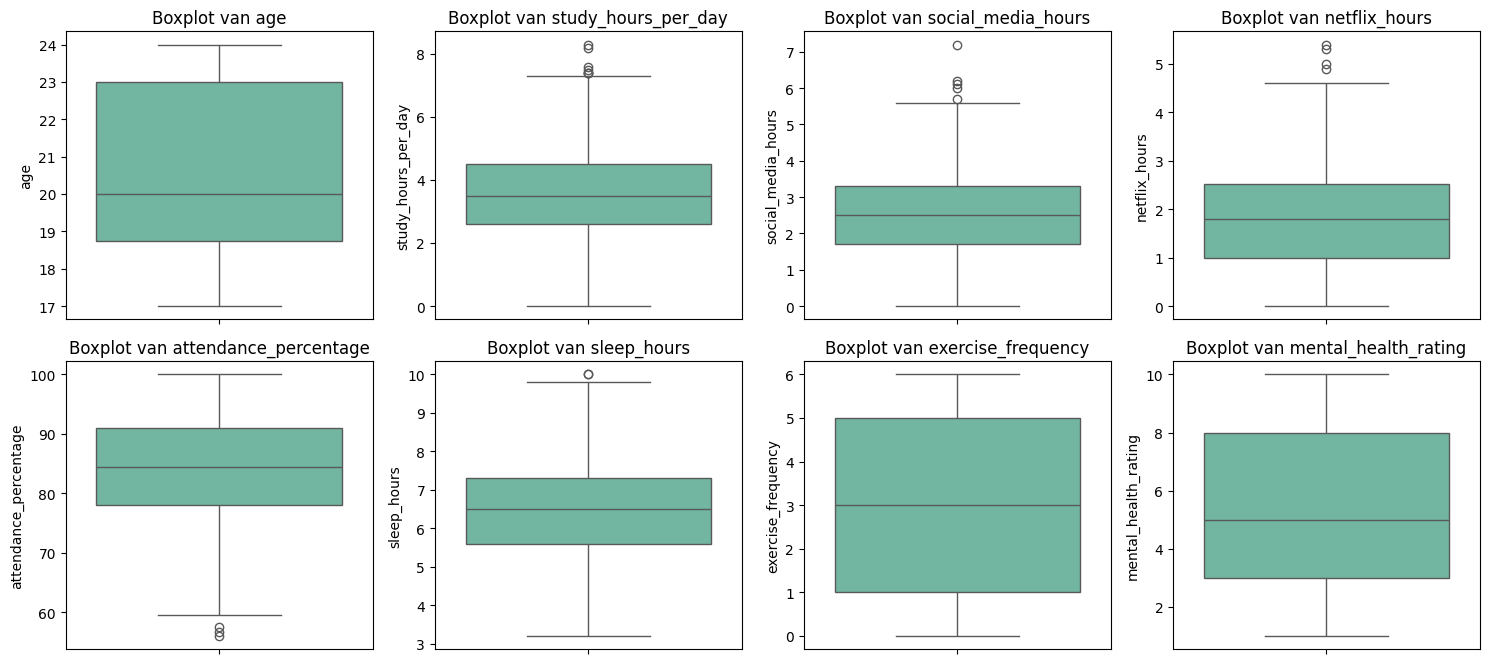

     age  study_hours_per_day  social_media_hours  netflix_hours  \
245   18                  0.6                 3.1            3.0   
317   19                  4.5                 6.0            2.2   
332   17                  4.4                 6.1            0.0   
416   19                  8.3                 3.3            2.6   
503   24                  4.0                 3.3            5.4   
665   19                  2.9                 7.2            2.9   
721   23                  8.2                 2.2            1.5   
745   22                  2.6                 3.4            5.3   

     attendance_percentage  sleep_hours  exercise_frequency  \
245                   79.9          5.2                   1   
317                   95.3          7.6                   3   
332                   92.6          5.1                   4   
416                   86.6          6.5                   5   
503                   81.2          7.6                   6   
665      

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
901,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
902,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
903,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [6]:
# boxplot voor outliers - doe ik alleen voor niet-object kolommen. De object kolommen hebben geen null values, dus kunnen we voor nu meenemen zonder check.
df_clean_non_object = df_clean.select_dtypes(exclude=["object"])

plt.figure(figsize=(15, 10))
for i, column in enumerate(df_clean_non_object.columns[:-1], 1):  # Exclude 'exam score'
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column], palette='Set2')
    plt.title(f'Boxplot van {column}')
plt.tight_layout()
plt.show()

# voor study_houers_per_day, social_media_hours, netflix_hours, attendance_percentage en sleep_hours zie ik indicaties voor outliers (punten buiten de whiskers).
# deze ga ik verder onderzoeken met een z-score

# z-score bepalen en outliers printen
z_scores = np.abs(stats.zscore(df_clean_non_object))
z_df = pd.DataFrame(z_scores, columns=df_clean_non_object.columns)
threshold = 3 # vrij arbitrair maar een gebruikelijke score
outlier_mask = z_df > threshold
outliers = outlier_mask.any(axis=1)
print(df_clean_non_object[outliers])

# print ook de reden waarom deze regel een outlier is
for idx in df_clean_non_object[outliers].index:
    kolommen = outlier_mask.loc[idx]
    afwijkende_kolommen = kolommen[kolommen].index.tolist()
    print(f"Rij {idx} is een outlier in kolom(men): {afwijkende_kolommen}")

# note: ik bepaal hier zelf wat wel en niet terechte outliers zijn. Dat zou je normaal natuurlijk in overleg met de business doen.
# Rij 245 is een outlier in kolom(men): ['exam_score']              --> geen terechte outlier. studeert weinig, zit veel op social media en netflix, slaapt slecht. Dus lijkt mij te verklaren.
# Rij 317 is een outlier in kolom(men): ['social_media_hours']      --> terechte outlier: studeren + social media + netflix = 20.3 uur. 95% aanwezig bij lectures en ook nog eens drie keer sporten. Dat lijkt mij niet mogelijk.
# Rij 332 is een outlier in kolom(men): ['social_media_hours']      --> zelfde als rij 317
# Rij 416 is een outlier in kolom(men): ['study_hours_per_day']     --> zelfde als rij 317
# Rij 503 is een outlier in kolom(men): ['netflix_hours']           --> zelfde als rij 317
# Rij 665 is een outlier in kolom(men): ['social_media_hours']      --> geen terechte outlier. uren tellen op naar een redelijk aantal.
# Rij 721 is een outlier in kolom(men): ['study_hours_per_day']     --> geen terechte outlier. uren tellen op naar een redelijk aantal.
# Rij 745 is een outlier in kolom(men): ['netflix_hours']           --> geen terechte outlier. uren tellen op naar een redelijk aantal.

# op basis hiervan verwijder ik regels met (de nieuwe) index 317, 332, 416 en 503. Ik reindex daarna direct weer.
df_clean_no_outliers = df_clean.drop(index=[317, 332, 416, 503]).reset_index(drop=True)
df_clean_no_outliers



# **[dubbel klik hier en geef antwoord op de vragen]**
2. Zie comments in script

              age  study_hours_per_day  social_media_hours  netflix_hours  \
count  905.000000           905.000000          905.000000     905.000000   
mean    20.478453             3.530939            2.495028       1.827182   
std      2.300882             1.463711            1.154755       1.064913   
min     17.000000             0.000000            0.000000       0.000000   
25%     18.000000             2.500000            1.700000       1.000000   
50%     20.000000             3.500000            2.500000       1.800000   
75%     22.000000             4.500000            3.300000       2.600000   
max     24.000000             8.200000            7.200000       5.300000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count             905.000000   905.000000          905.000000   
mean               83.858011     6.473039            3.045304   
std                 9.461576     1.219632            2.036488   
min                56.000000     3.200000     

/tmp/ipython-input-7-2780956188.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score_bucket', data=df_clean_no_outliers, palette='viridis')


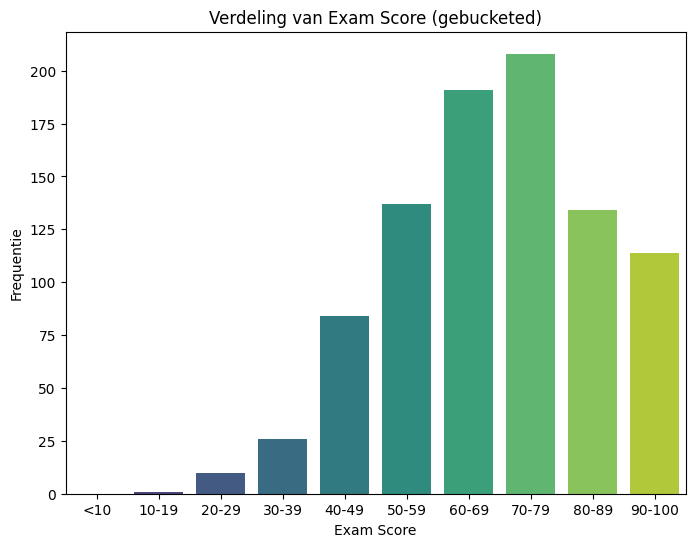


Kolom: gender
Frequenties:
gender
Male      437
Female    432
Other      36
Name: count, dtype: int64

Kolom: part_time_job
Frequenties:
part_time_job
No     711
Yes    194
Name: count, dtype: int64

Kolom: diet_quality
Frequenties:
diet_quality
Fair    394
Good    347
Poor    164
Name: count, dtype: int64

Kolom: parental_education_level
Frequenties:
parental_education_level
High School    390
Bachelor       348
Master         167
Name: count, dtype: int64

Kolom: internet_quality
Frequenties:
internet_quality
Good       409
Average    350
Poor       146
Name: count, dtype: int64

Kolom: extracurricular_participation
Frequenties:
extracurricular_participation
No     618
Yes    287
Name: count, dtype: int64


In [7]:
#2. code om de verdeling van je data te bekijken, laat wat basis info zien:
#   hoeveel rijen bevat je data? wat is de verdeling van je voorspellende variabel.
#   analiseer je variabelen: heb je genoeg voorbeelden van verschillen categoriën of is een onder vertegenwoordigd

# de schone dataset bevat nu 905 rijen
print(df_clean_no_outliers.describe())

# verdeling voorspellende variabele 'exam_score'
# verdeling ziet er relatief goed uit. Heel weinig super lage scores, maar dat is zoals verwacht. Ik zou het geen normaal verdeling willen noemen, want er zitten ook relatief veel hoge scores is. Maar zonder context is het lastig zeggen of dit verwacht is of niet.
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["<10", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-100"]

df_clean_no_outliers["score_bucket"] = pd.cut(df_clean_no_outliers["exam_score"], bins=bins, labels=labels, right=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='score_bucket', data=df_clean_no_outliers, palette='viridis')
plt.title('Verdeling van Exam Score (gebucketed)')
plt.xlabel('Exam Score')
plt.ylabel('Frequentie')
plt.show()

# analyse variabelen (objects)
# in elke categorie (op gender = other na) zitten in ieder geval meer dan 146 datapunten (dat is 16% procent van het totaal). Ik zou dat geen ondervertegenwoordiging noemen.
# wel zijn part_time_job (veel meer nee dan ja) en extracurricular_participation (meer nee dan ja) scheef verdeelt. Maar dit geeft denk ik wel de werkelijkheid aan. Ook de groepen master opleiding, poor internet en poor dieet zijn minder vertegenwoordigd dan de andere groepen in de variabelen.
df_clean_no_outliers_objects = df_clean_no_outliers.select_dtypes(include='object')
columns_to_check = df_clean_no_outliers_objects.columns[1:] # ik haal student_id eruit

for c in columns_to_check:
  print(f"\nKolom: {c}")
  frequenties = df_clean_no_outliers_objects[c].value_counts(dropna=False)
  print("Frequenties:")
  print(frequenties)


# **[dubbel klik hier en geef antwoord op de vragen]**
3. Zie comments in de code

Tussen de features zijn heel weinig correlaties.
Vooral study_hours_per_day en mental_heatlh_rating correleren relatief sterk met de exam_score.
social_media_hours, netflix_hours, attendance_percentage, sleep_hours en exercise_frequency correleren ook, maar een stuk minder sterk.

Conclusie: niet elke variabelen lijkt heel sterk bij te dragen aan de uiteindelijke exam score, zoals we in de correlatiematrix ook kunnen zien. Maar, omdat we maar een beperkte set aan data hebben (ongeveer 900 regels) en common sense ook wat waard is, neem ik toch ook de features mee die minder correleren. Bij het bouwen van het model zelf kan altijd nog gekeken worden of de resultaten beter worden als we deze minder correlerende features achterwege laten.


4. Ik ga mijn hyptheses aanpassen op basis van de bevindingen.

H1: studenten met een jongere leeftijd, hebben een significant hogere kans op studievertraging of -uitval --> VERVALT VOLLEDIG

H2: studenten die meer investeren in hun studie, hebben een significant lagere kans op studievertraging of -uitval.
- Variabelen:
  - study_hours_per_day: houden we
  - extracurricular_participation: vervalt
  - attendace_percentage: houden we
  - social_media_hours: houden we
  - netflix_hours: houden we
  - internet_quality: vervalt

H3: studenten die zorg dragen voor hun gezondheid, hebben een significant lagere kans op studievertraging of -uitval.
- Variabelen:
  - sleep_hours: houden we
  - diet_quality: vervalt
  - exercise_frequency: houden we
  - mental_health_rating: houden we

H4: studenten met veel 'andere' activiteiten in hun schema, hebben een significant hogere kans op studievertraging of -uitval --> deze laat ik in zijn geheel vervallen, omdat de gebruikte variabelen al terugkomen in de andere hypothesen.

H5: studenten met ouders die zelf ook bekend zijn met de universitaire wereld, hebben een significant lagere kans op studievertraging of -uitval --> VERVALT VOLLEDIG

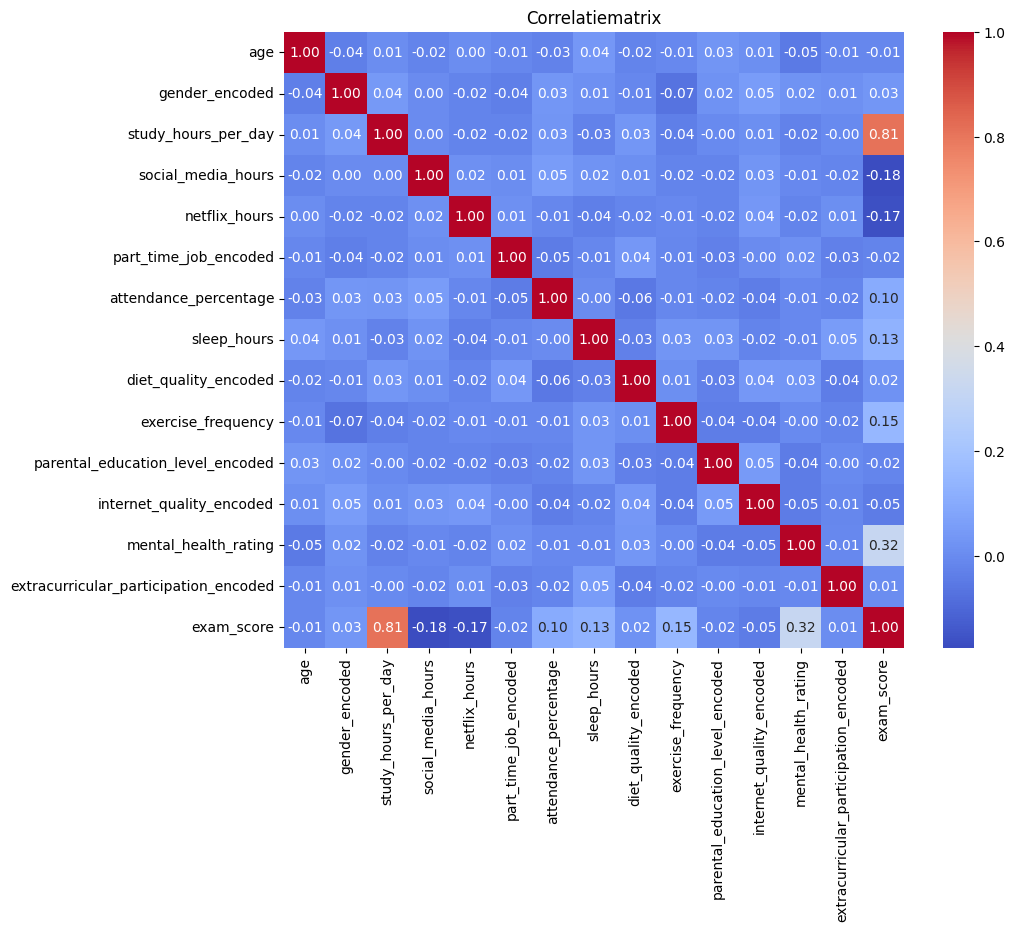

In [8]:
#3. code voor verbanden: denk aan scatterplots, correlatiemetrixes etc.

# ordinale en binaire categorieën omzetten
diet_quality_order = ["Poor", "Fair", "Good"]
df_clean_no_outliers["diet_quality_encoded"] = pd.Categorical(df_clean_no_outliers["diet_quality"], categories=diet_quality_order, ordered=True)
df_clean_no_outliers["diet_quality_encoded"] = df_clean_no_outliers["diet_quality_encoded"].cat.codes

parental_education_level_order = ["High School", "Bachelor", "Master"]
df_clean_no_outliers["parental_education_level_encoded"] = pd.Categorical(df_clean_no_outliers["parental_education_level"], categories=parental_education_level_order, ordered=True)
df_clean_no_outliers["parental_education_level_encoded"] = df_clean_no_outliers["parental_education_level_encoded"].cat.codes

internet_quality_order = ["Poor", "Average", "Good"]
df_clean_no_outliers["internet_quality_encoded"] = pd.Categorical(df_clean_no_outliers["internet_quality"], categories=internet_quality_order, ordered=True)
df_clean_no_outliers["internet_quality_encoded"] = df_clean_no_outliers["internet_quality_encoded"].cat.codes

df_clean_no_outliers["part_time_job_encoded"] = df_clean_no_outliers["part_time_job"].map({'No' :0, 'Yes': 1})

df_clean_no_outliers["gender_encoded"] = df_clean_no_outliers["gender"].map({'Male' :0, 'Female': 1})

df_clean_no_outliers["extracurricular_participation_encoded"] = df_clean_no_outliers["extracurricular_participation"].map({'No' :0, 'Yes': 1})

# maak df voor correlaties
df_corr = df_clean_no_outliers[["age", "gender_encoded", "study_hours_per_day", "social_media_hours", "netflix_hours", "part_time_job_encoded", "attendance_percentage", "sleep_hours", "diet_quality_encoded", "exercise_frequency", "parental_education_level_encoded", "internet_quality_encoded", "mental_health_rating", "extracurricular_participation_encoded", "exam_score"]]

# correlatie met spearman omdat we ordinale en binaire categorieën hebben

plt.figure(figsize=(10, 8))
correlation_matrix = df_corr.corr(method="spearman")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlatiematrix')
plt.show()



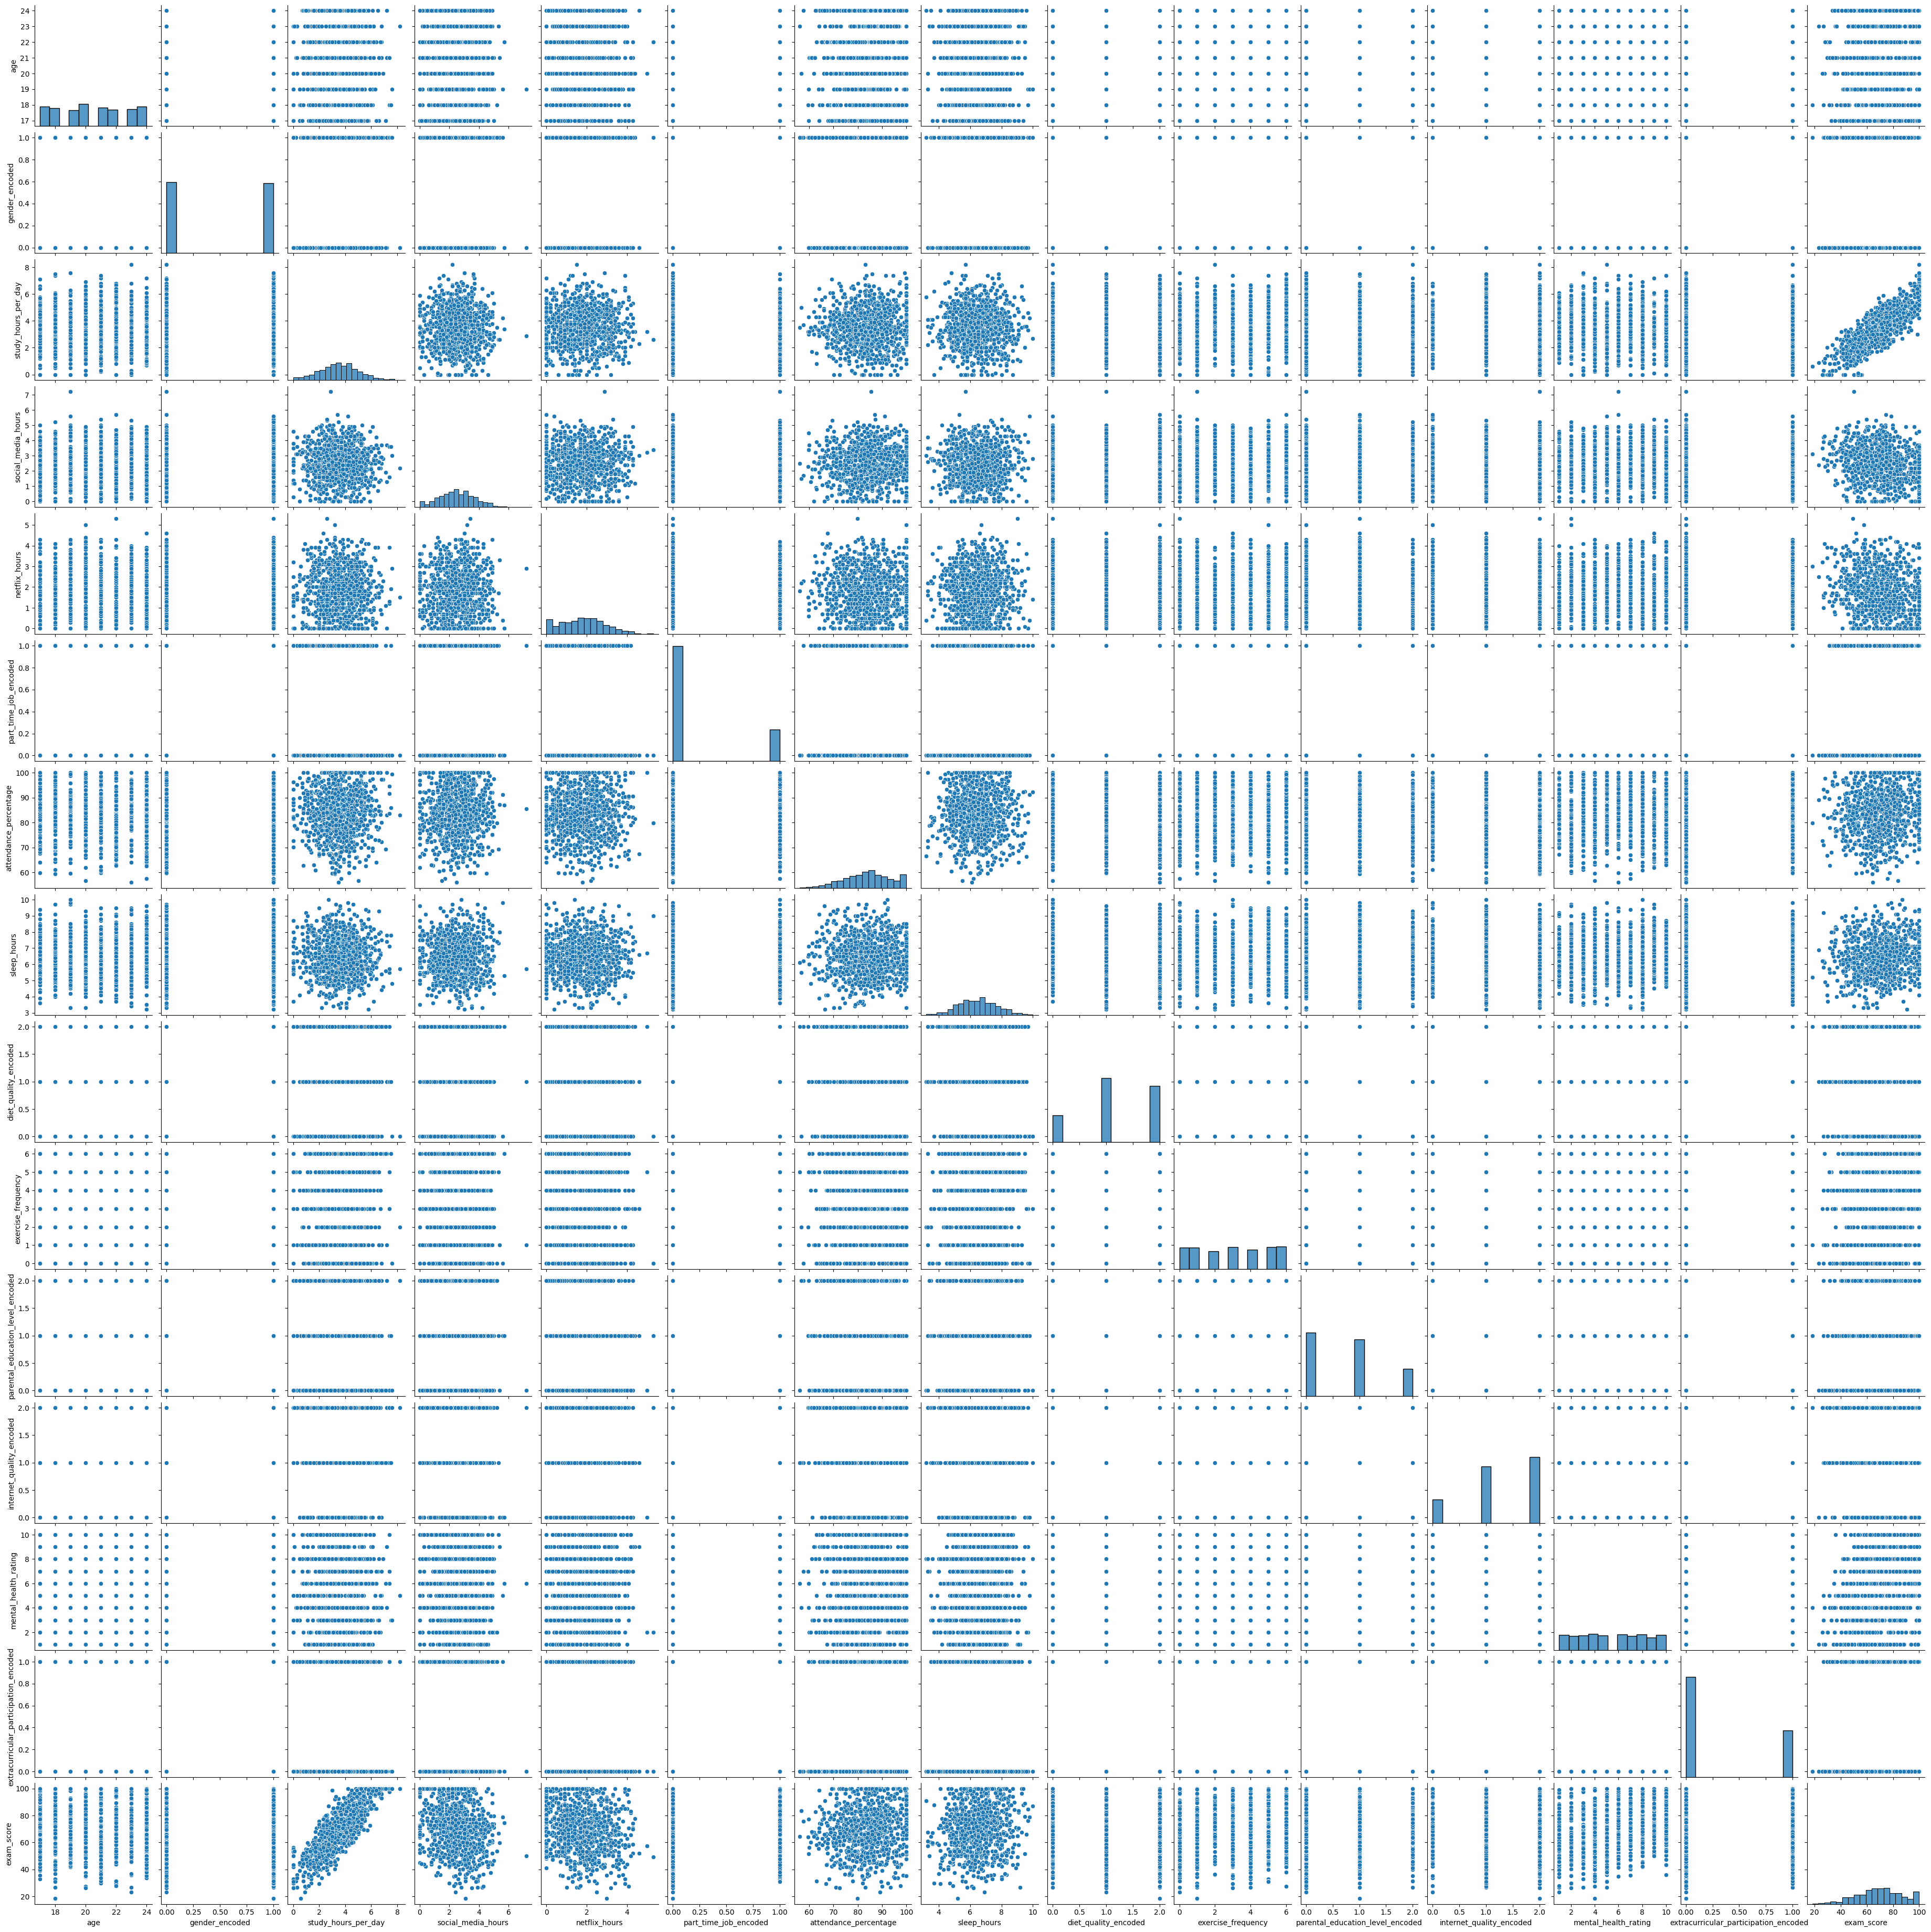

In [ ]:
# 5. Pairplot voor relaties tussen variabelen
sns.pairplot(df_corr)
plt.show()

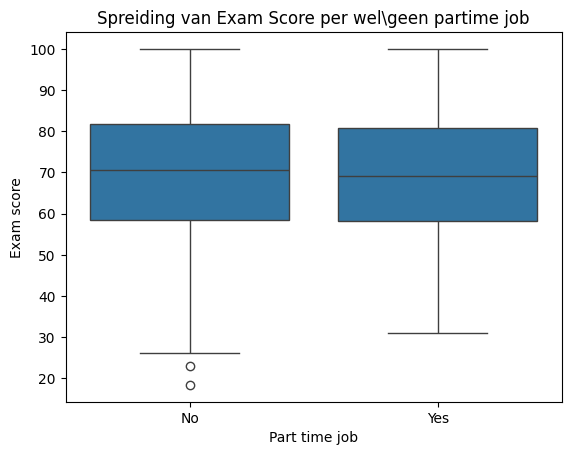

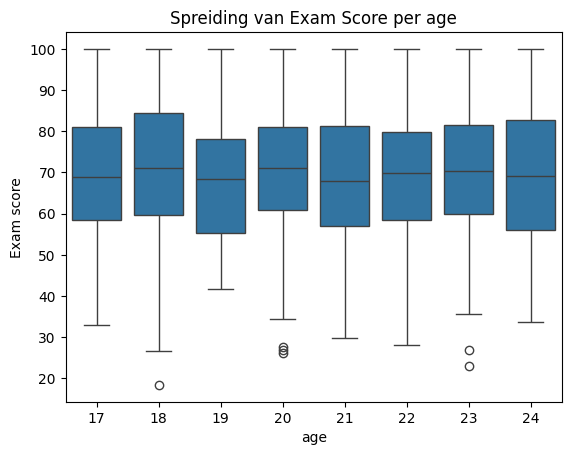

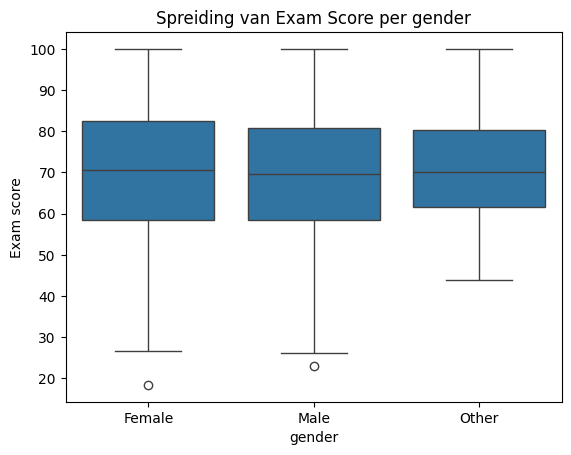

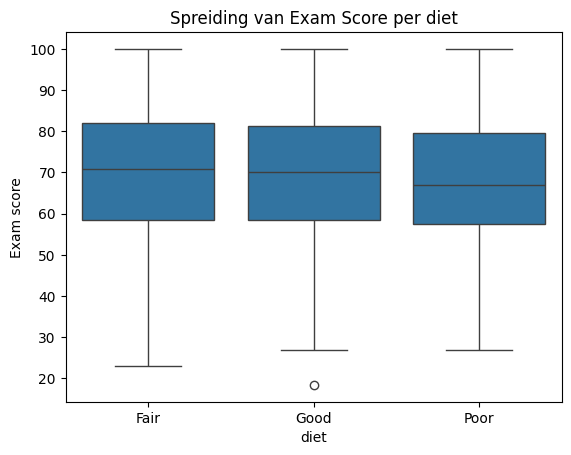

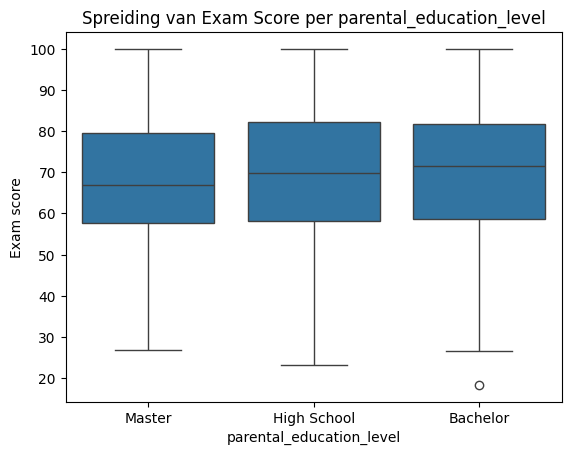

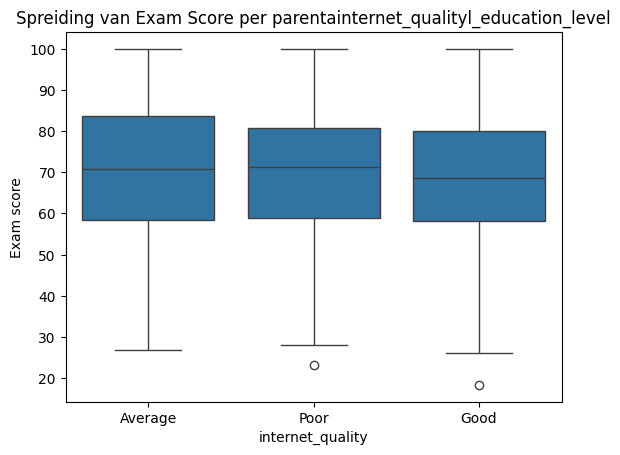

In [9]:
# vind het wat gek dat zo weinig variabelen correleren --> extra check met boxplot
# op basis van de boxplots lijkt het wel te kloppen dat er bijna geen correlatie is

sns.boxplot(x='part_time_job', y='exam_score', data=df_clean_no_outliers)
plt.title('Spreiding van Exam Score per wel\geen partime job')
plt.xlabel('Part time job')
plt.ylabel('Exam score')
plt.show()

sns.boxplot(x='age', y='exam_score', data=df_clean_no_outliers)
plt.title('Spreiding van Exam Score per age')
plt.xlabel('age')
plt.ylabel('Exam score')
plt.show()

sns.boxplot(x='gender', y='exam_score', data=df_clean_no_outliers)
plt.title('Spreiding van Exam Score per gender')
plt.xlabel('gender')
plt.ylabel('Exam score')
plt.show()

sns.boxplot(x='diet_quality', y='exam_score', data=df_clean_no_outliers)
plt.title('Spreiding van Exam Score per diet')
plt.xlabel('diet')
plt.ylabel('Exam score')
plt.show()

sns.boxplot(x='parental_education_level', y='exam_score', data=df_clean_no_outliers)
plt.title('Spreiding van Exam Score per parental_education_level')
plt.xlabel('parental_education_level')
plt.ylabel('Exam score')
plt.show()

sns.boxplot(x='internet_quality', y='exam_score', data=df_clean_no_outliers)
plt.title('Spreiding van Exam Score per parentainternet_qualityl_education_level')
plt.xlabel('internet_quality')
plt.ylabel('Exam score')
plt.show()

#opdracht 2: feature engineering - selecteer variabelen en sla ze op
We hebben nu een hypothese en de klant kan zich vinden in de hypothese die je hebt opgesteld.  

**Let op: je gaat een in deze opdracht twee datasets bouwen= je gaat twee feature tabellen opstellen eentje voor een regressie analyse en eentje voor een shallow learning model naar keuze**

1. Creëer een DF met features voor het multipele regressie model

2. sla je df_regressie op in je drive

1. creëer een DF met de features die je wilt gebruiken voor jouw gekozen model, ging je features omgooien naar categoriën of van categoriën naar cijfers? dan doe je dat hier.

2. sla je df_eigen_gekozen_model op in je drive


In [10]:
#1. creëer je feature engineering script voor het regressie model

# kolom selectie
df_regressie = df_corr[["study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating", "exam_score"]]

# Normalisatie van numerieke variabelen
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_regressie.drop('exam_score', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df_regressie.columns[:-1])
df_scaled['exam_score'] = df_regressie['exam_score']

print("Genormaliseerde dataset:")
print(df_scaled.head())


Genormaliseerde dataset:
   study_hours_per_day  social_media_hours  netflix_hours  \
0             0.000000            0.166667       0.207547   
1             0.841463            0.388889       0.433962   
2             0.170732            0.430556       0.245283   
3             0.121951            0.541667       0.188679   
4             0.609756            0.611111       0.094340   

   attendance_percentage  sleep_hours  exercise_frequency  \
0               0.659091     0.705882            1.000000   
1               0.938636     0.205882            1.000000   
2               0.881818     0.705882            0.166667   
3               0.340909     0.882353            0.666667   
4               0.793182     0.250000            0.500000   

   mental_health_rating  exam_score  
0              0.777778        56.2  
1              0.777778       100.0  
2              0.000000        34.3  
3              0.000000        26.8  
4              0.000000        66.4  


In [11]:
#2. sla je feature engineering script op

# Map aanmaken
os.makedirs('project_university', exist_ok=True)  # exist_ok=True voorkomt fouten als de map al bestaat
print("Map 'project_university' aangemaakt!")

# Model opslaan
df_scaled.to_pickle('project_university/regressie_dataset.pkl')
print("Model opgeslagen als 'regressie_dataset.pkl'")

Map 'project_university' aangemaakt!
Model opgeslagen als 'regressie_dataset.pkl'


In [12]:
#3. creëer je feature engineering script voor je eigen gekozen model

def classifier(score):
  if score <= 40:
    return 'laag'
  if score <= 70:
    return 'middel'
  else:
    return 'hoog'

df_classifier = df_corr[["study_hours_per_day", "social_media_hours", "netflix_hours", "attendance_percentage", "sleep_hours", "exercise_frequency", "mental_health_rating", "exam_score"]]
df_classifier['exam_score_klasse'] = df_corr["exam_score"].apply(classifier)
df_classifier = df_classifier.drop("exam_score", axis=1)

df_classifier

/tmp/ipython-input-12-934316335.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classifier['exam_score_klasse'] = df_corr["exam_score"].apply(classifier)


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score_klasse
0,0.0,1.2,1.1,85.0,8.0,6,8,middel
1,6.9,2.8,2.3,97.3,4.6,6,8,hoog
2,1.4,3.1,1.3,94.8,8.0,1,1,laag
3,1.0,3.9,1.0,71.0,9.2,4,1,laag
4,5.0,4.4,0.5,90.9,4.9,3,1,middel
...,...,...,...,...,...,...,...,...
900,2.6,0.5,1.6,77.0,7.5,2,6,hoog
901,2.9,1.0,2.4,86.0,6.8,1,6,middel
902,3.0,2.6,1.3,61.9,6.5,5,9,middel
903,5.4,4.1,1.1,100.0,7.6,0,1,middel


In [13]:
#4. sla je feature engineering script op

# Map aanmaken
os.makedirs('project_university', exist_ok=True)  # exist_ok=True voorkomt fouten als de map al bestaat
print("Map 'project_university' aangemaakt!")

# Model opslaan
df_classifier.to_pickle('project_university/classifier_dataset.pkl')
print("Model opgeslagen als 'classifier_dataset.pkl'")

Map 'project_university' aangemaakt!
Model opgeslagen als 'classifier_dataset.pkl'
